In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid', palette='colorblind')
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path    = 'data/'  # If data in 'data' directory
delian = pd.read_excel(path + 'DeLiAn_edited.xlsx', sheet_name=None)
# Now delian is a dictionary where each key is the sheet name
# and each value is the corresponding DataFrame

In [3]:
for sheet_name, df in delian.items():
    print(f"Sheet Name: {sheet_name}")
    #print(df.head())
    print("----------------------------------------------------------------")

Sheet Name: List of variables
----------------------------------------------------------------
Sheet Name: 1
----------------------------------------------------------------
Sheet Name: 6
----------------------------------------------------------------
Sheet Name: 2
----------------------------------------------------------------
Sheet Name: 7
----------------------------------------------------------------
Sheet Name: 3
----------------------------------------------------------------
Sheet Name: 8
----------------------------------------------------------------
Sheet Name: 13
----------------------------------------------------------------
Sheet Name: 9
----------------------------------------------------------------
Sheet Name: 14
----------------------------------------------------------------
Sheet Name: 10
----------------------------------------------------------------
Sheet Name: 18
----------------------------------------------------------------
Sheet Name: 11
-----------------

In [4]:
variable_names = delian['List of variables']
# Iterate through each sheet and rename them
for sheet_name in delian.keys():
    if sheet_name != 'List of variables':
        # Filter the rows based on the condition and selecting the 'Variables (unit)' column
        new_sheet_name = variable_names.loc[variable_names['Sheet'] == int(sheet_name), 'Variables (unit)'].values[0]
        delian[new_sheet_name] = delian.pop(sheet_name)
        
delian.keys()

dict_keys(['List of variables', 'angstrom_exponent_backscatter_355_532 (1)', 'error_angstrom_exponent_backscatter_355_532 (1)', 'angstrom_exponent_backscatter_532_1064 (1)', 'error_angstrom_exponent_backscatter_532_1064 (1)', 'angstrom_exponent_extinction_355_532 (1)', 'error_angstrom_exponent_extinction_355_532 (1)', 'lidar_ratio_355 (sr)', 'error_lidar_ratio_355 (sr)', 'lidar_ratio_532 (sr)', 'error_lidar_ratio_532 (sr)', 'particle_linear_depolarization_ratio_355 (%)', 'error_particle_linear_depolarization_ratio_355 (%)', 'particle_linear_depolarization_ratio_532 (%)', 'error_particle_linear_depolarization_ratio_532 (%)', 'number_samples (1)', 'campaign_rv', 'date', 'location', 'measurement_type', 'reference', 'system'])

### **Data Preprocessing**

In [5]:
samples = delian['number_samples (1)']
samples

,Ash,Saharan dust,Central Asian dust,Middle Eastern dust,Smoke,Stratospheric smoke,Dust and smoke,Pollution,Dust and pollution,Dried marine,Clean marine,Dust and marine,Central European background
0,4,30,23,4,71,8,25,42,15,7,52,21,14


In [6]:
#Define a new df containing the label (type of aerosol) of all observations
aerosol = []
for col in samples.columns:
  for i in range(int(samples[col].iloc[0])):
    aerosol.append(col)
aerosol = pd.DataFrame({"aerosol": aerosol})
aerosol['aerosol'] = aerosol['aerosol'].astype('category') #convert type from Object to Categorical
aerosol

,aerosol
0,Ash
1,Ash
2,Ash
3,Ash
4,Saharan dust
...,...
311,Central European background
312,Central European background
313,Central European background
314,Central European background


In [7]:
# Sheets to be interessed
quantitatives = [
    'angstrom_exponent_backscatter_355_532 (1)',
    'error_angstrom_exponent_backscatter_355_532 (1)',
    'angstrom_exponent_backscatter_532_1064 (1)',
    'error_angstrom_exponent_backscatter_532_1064 (1)',
    'angstrom_exponent_extinction_355_532 (1)',
    'error_angstrom_exponent_extinction_355_532 (1)',
    'lidar_ratio_355 (sr)',
    'error_lidar_ratio_355 (sr)',
    'lidar_ratio_532 (sr)',
    'error_lidar_ratio_532 (sr)',
    'particle_linear_depolarization_ratio_355 (%)',
    'error_particle_linear_depolarization_ratio_355 (%)',
    'particle_linear_depolarization_ratio_532 (%)',
    'error_particle_linear_depolarization_ratio_532 (%)'
]
delian = {key: delian[key] for key in quantitatives}

In [8]:
properties = [
    'angstrom_exponent_backscatter_355_532 (1)',
    'angstrom_exponent_backscatter_532_1064 (1)',
    'angstrom_exponent_extinction_355_532 (1)',
    'lidar_ratio_355 (sr)',
    'lidar_ratio_532 (sr)',
    'particle_linear_depolarization_ratio_355 (%)',
    'particle_linear_depolarization_ratio_532 (%)',
]

In [9]:
errors = [
    'error_angstrom_exponent_backscatter_355_532 (1)',
    'error_angstrom_exponent_backscatter_532_1064 (1)',
    'error_angstrom_exponent_extinction_355_532 (1)',
    'error_lidar_ratio_355 (sr)',
    'error_lidar_ratio_532 (sr)',
    'error_particle_linear_depolarization_ratio_355 (%)',
    'error_particle_linear_depolarization_ratio_532 (%)'
]

In [10]:
# Convert each sheet to a column as variable
delian_df = pd.DataFrame()

# Iterate through each sheet and extract information
for sheet_name, df in delian.items():
  new_values = []
  for col in df.columns:
    for value in df[col]:
      # Check if the value is not NaN
      if pd.notna(value):
        new_values.append(value)
  new_df = pd.DataFrame({sheet_name: new_values})
  delian_df = pd.concat([delian_df, new_df], axis=1)

delian_df = pd.concat([delian_df, aerosol], axis=1)
delian_df

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%),aerosol
0,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,55.00,5.00,-9999.0,-9999.0,36.50,1.0,-9999.0,-9999.0,Ash
1,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,55.00,5.00,-9999.0,-9999.0,37.50,2.0,-9999.0,-9999.0,Ash
2,0.22,0.4,1.05,0.43,0.68,0.63,39.00,10.00,32.0,4.0,-9999.00,-9999.0,-9999.0,-9999.0,Ash
3,1.00,-9999.0,1.00,-9999.00,1.00,-9999.00,55.00,10.00,64.0,11.0,34.00,4.0,-9999.0,-9999.0,Ash
4,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,63.00,9.00,-9999.0,-9999.0,24.00,2.0,31.0,1.0,Saharan dust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,48.07,2.24,-9999.0,-9999.0,2.91,2.0,-9999.0,-9999.0,Central European background
312,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,58.02,7.59,-9999.0,-9999.0,3.76,2.0,-9999.0,-9999.0,Central European background
313,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,58.57,5.69,-9999.0,-9999.0,3.75,2.0,-9999.0,-9999.0,Central European background
314,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,60.56,3.41,-9999.0,-9999.0,3.91,2.0,-9999.0,-9999.0,Central European background


We can't have a negative error

In [11]:
for col in errors:
    delian_df[col] = delian_df[col].abs()  # Convert values in the error columns to absolute values

delian_df.head()

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%),aerosol
0,-9999.00,9999.0,-9999.00,9999.00,-9999.00,9999.00,55.0,5.0,-9999.0,9999.0,36.5,1.0,-9999.0,9999.0,Ash
1,-9999.00,9999.0,-9999.00,9999.00,-9999.00,9999.00,55.0,5.0,-9999.0,9999.0,37.5,2.0,-9999.0,9999.0,Ash
2,0.22,0.4,1.05,0.43,0.68,0.63,39.0,10.0,32.0,4.0,-9999.0,9999.0,-9999.0,9999.0,Ash
3,1.00,9999.0,1.00,9999.00,1.00,9999.00,55.0,10.0,64.0,11.0,34.0,4.0,-9999.0,9999.0,Ash
4,-9999.00,9999.0,-9999.00,9999.00,-9999.00,9999.00,63.0,9.0,-9999.0,9999.0,24.0,2.0,31.0,1.0,Saharan dust


### **Visualization**

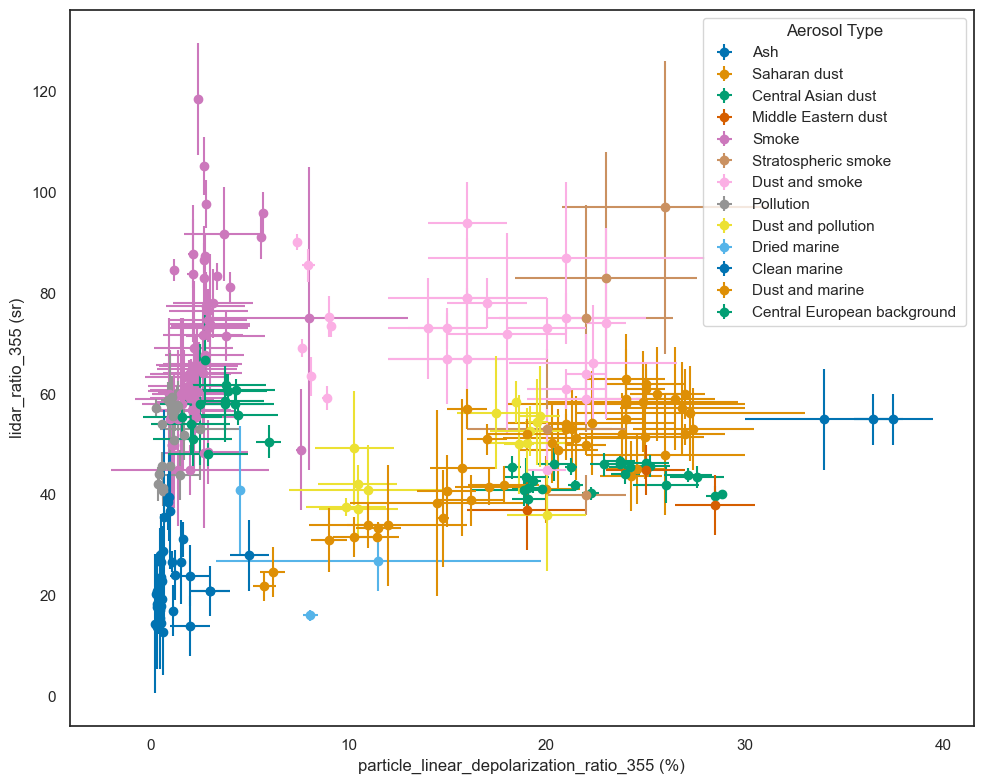

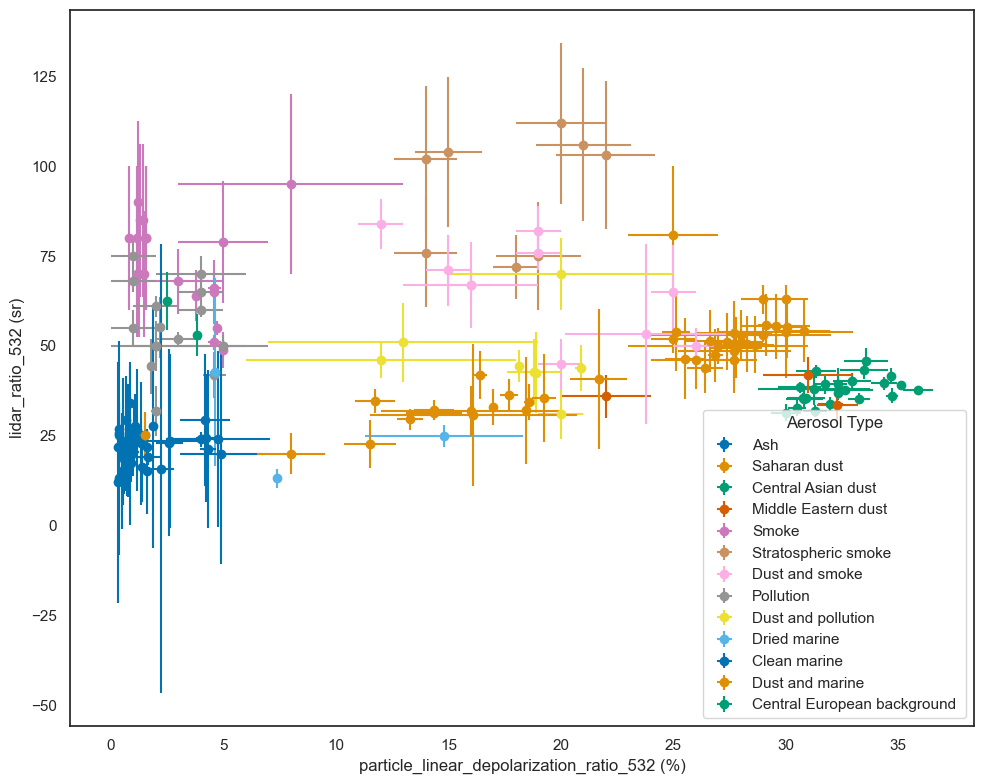

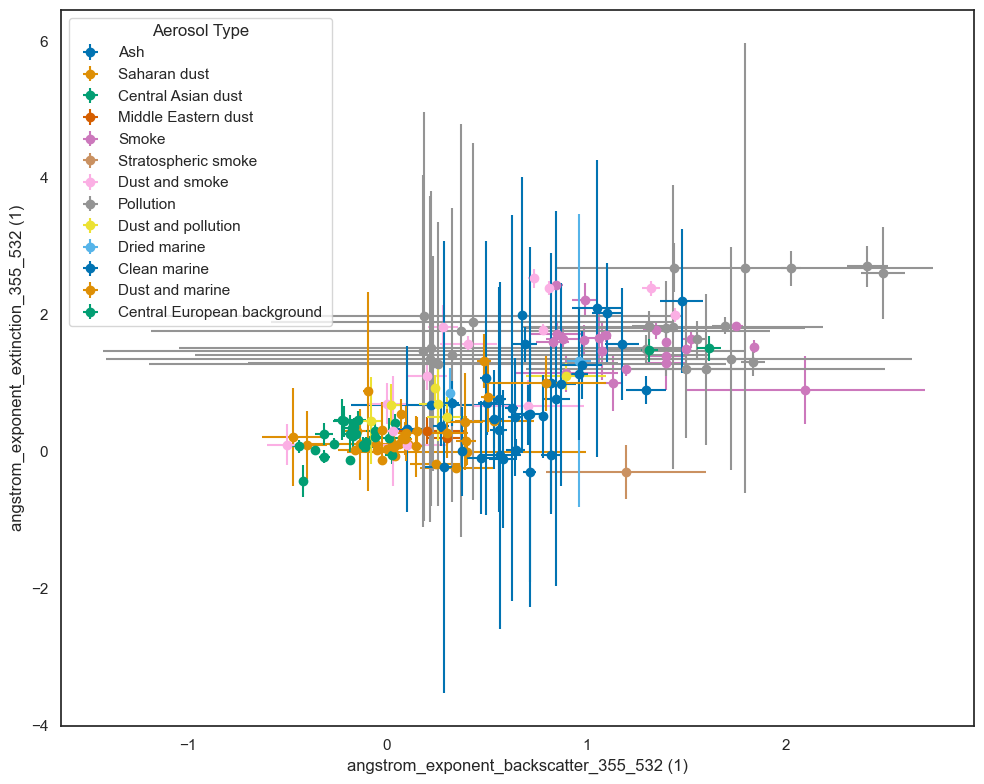

In [12]:
def visualize_with_error(df, x, y):
    plt.figure(figsize=(10, 8))
    sns.set_style("white")
    for aerosol_type in delian_df['aerosol'].unique():
        subset = df[delian_df['aerosol'] == aerosol_type]
        
        valid_subset = subset[(subset['error_' + x] != 9999) & 
                              (subset['error_' + y] != 9999)]
        
        plt.errorbar(valid_subset[x], valid_subset[y],
                    xerr=valid_subset['error_' + x], yerr=valid_subset['error_' + y],
                    fmt = "o", label=aerosol_type)
    
    plt.legend(title='Aerosol Type')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

visualize_with_error(delian_df, 'particle_linear_depolarization_ratio_355 (%)', 'lidar_ratio_355 (sr)')
visualize_with_error(delian_df, 'particle_linear_depolarization_ratio_532 (%)', 'lidar_ratio_532 (sr)')
visualize_with_error(delian_df, 'angstrom_exponent_backscatter_355_532 (1)', 'angstrom_exponent_extinction_355_532 (1)')

### **Data Imputation**

In [13]:
def mean_without_9999(column):
    mean = column[abs(column) != 9999.].mean()
    return mean

def replace_9999(column):
    mean = mean_without_9999(column)
    column[abs(column) == 9999.] = mean
    return column

df = delian_df.groupby('aerosol', observed=True).transform(replace_9999)

df.head()

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%)
0,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.0,5.0,48.00000,7.500000,36.5,1.000000,NaN,NaN
1,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.0,5.0,48.00000,7.500000,37.5,2.000000,NaN,NaN
2,0.220000,0.400000,1.050000,0.430000,0.680000,0.63000,39.0,10.0,32.00000,4.000000,36.0,2.333333,NaN,NaN
3,1.000000,0.400000,1.000000,0.430000,1.000000,0.63000,55.0,10.0,64.00000,11.000000,34.0,4.000000,NaN,NaN
4,0.028737,0.109849,0.459035,0.117678,0.100489,0.17537,63.0,9.0,53.06897,7.863113,24.0,2.000000,31.0,1.0


In [14]:
from sklearn.impute import SimpleImputer

# Create an imputer object to fill NaNs with the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer and transform the scaled data to fill in NaNs
df_imputed = imputer.fit_transform(df)

df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

df_imputed.head()

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%)
0,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.0,5.0,48.00000,7.500000,36.5,1.000000,10.883079,0.909911
1,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.0,5.0,48.00000,7.500000,37.5,2.000000,10.883079,0.909911
2,0.220000,0.400000,1.050000,0.430000,0.680000,0.63000,39.0,10.0,32.00000,4.000000,36.0,2.333333,10.883079,0.909911
3,1.000000,0.400000,1.000000,0.430000,1.000000,0.63000,55.0,10.0,64.00000,11.000000,34.0,4.000000,10.883079,0.909911
4,0.028737,0.109849,0.459035,0.117678,0.100489,0.17537,63.0,9.0,53.06897,7.863113,24.0,2.000000,31.000000,1.000000


In [15]:
df_imputed.duplicated().sum()

0

In [16]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
angstrom_exponent_backscatter_355_532 (1),316.0,0.779530,0.617844,-0.500000,0.272608,0.814661,1.365803,2.489430
error_angstrom_exponent_backscatter_355_532 (1),316.0,0.187158,0.268275,0.000214,0.047562,0.100000,0.183696,1.621820
angstrom_exponent_backscatter_532_1064 (1),316.0,0.799295,0.430504,-0.241943,0.491313,0.864506,1.166186,2.148480
error_angstrom_exponent_backscatter_532_1064 (1),316.0,0.168427,0.203761,0.000000,0.054529,0.109771,0.141246,1.151870
angstrom_exponent_extinction_355_532 (1),316.0,0.943316,0.692282,-0.428108,0.356404,0.932919,1.492750,2.706950
error_angstrom_exponent_extinction_355_532 (1),316.0,0.615900,0.651982,0.000501,0.177300,0.360162,0.820808,3.309086
lidar_ratio_355 (sr),316.0,50.673770,19.096687,12.821490,39.963554,51.113568,60.439445,118.548560
error_lidar_ratio_355 (sr),316.0,7.055542,5.290999,0.566400,3.323110,5.576068,9.000000,30.000000
lidar_ratio_532 (sr),316.0,49.166890,20.697239,12.063000,32.055051,48.000000,68.000000,112.000000
error_lidar_ratio_532 (sr),316.0,9.229730,6.964022,0.860434,4.563627,8.020870,11.135828,62.445038


### **Principal Componants Analysis** 

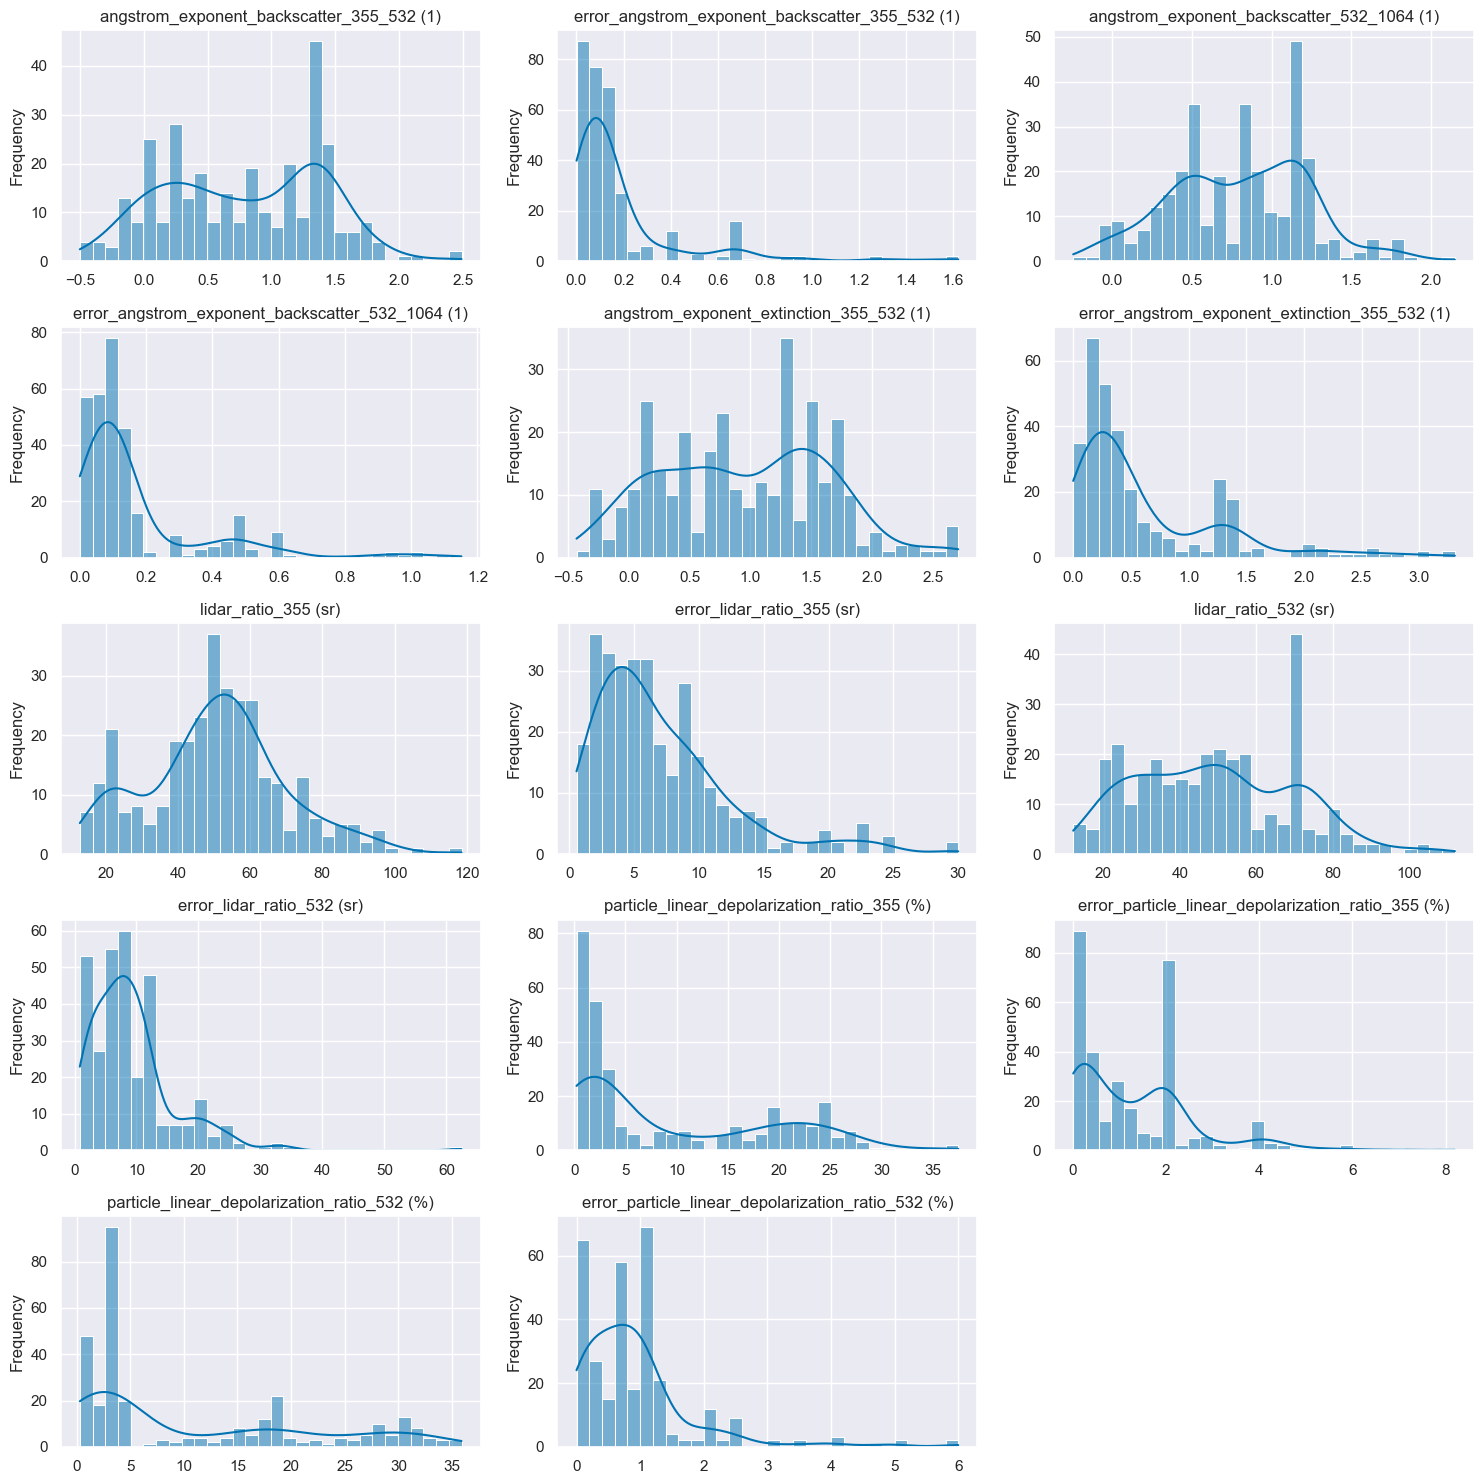

In [17]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(df_imputed.keys()):
    sns.histplot(data=df_imputed[column], bins = 30, kde=True, ax=axes[i])  
    axes[i].set_title(f'{column}')  # Set title for the plot
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(None)

# Adjust layoutcolumns)
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

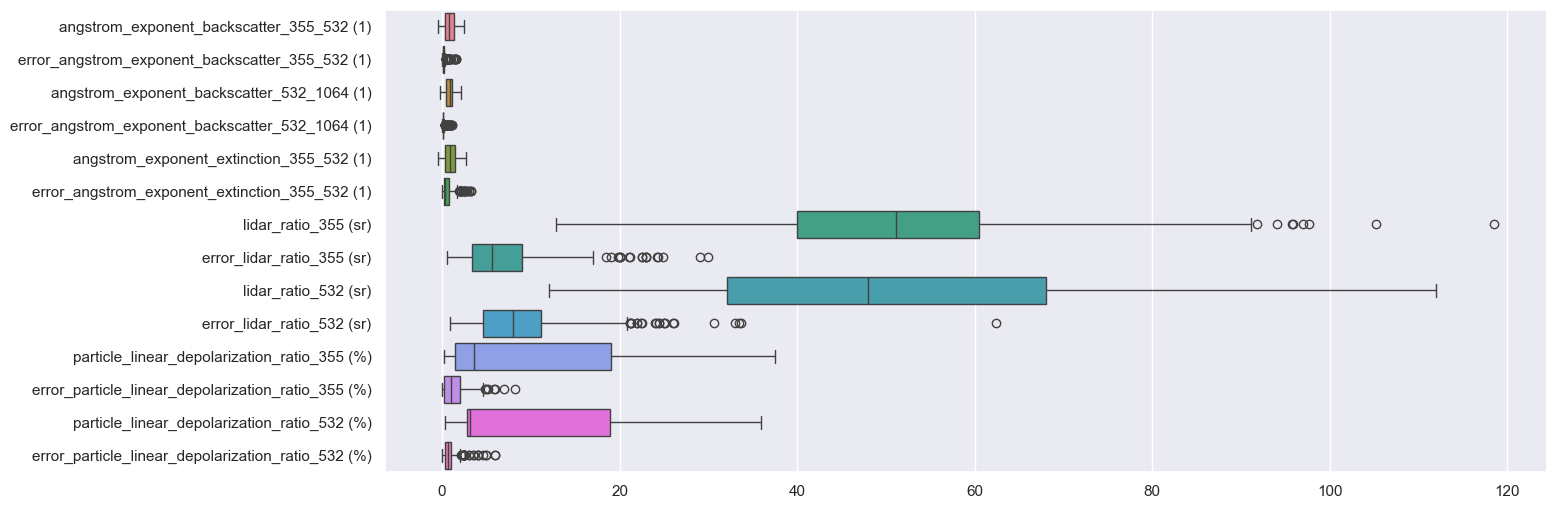

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_imputed, orient='h')  # 'h' for horizontal boxplots

plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
ss = StandardScaler()

# Fit and transform the data
df_scaled = ss.fit_transform(df_imputed)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = df_imputed.columns)

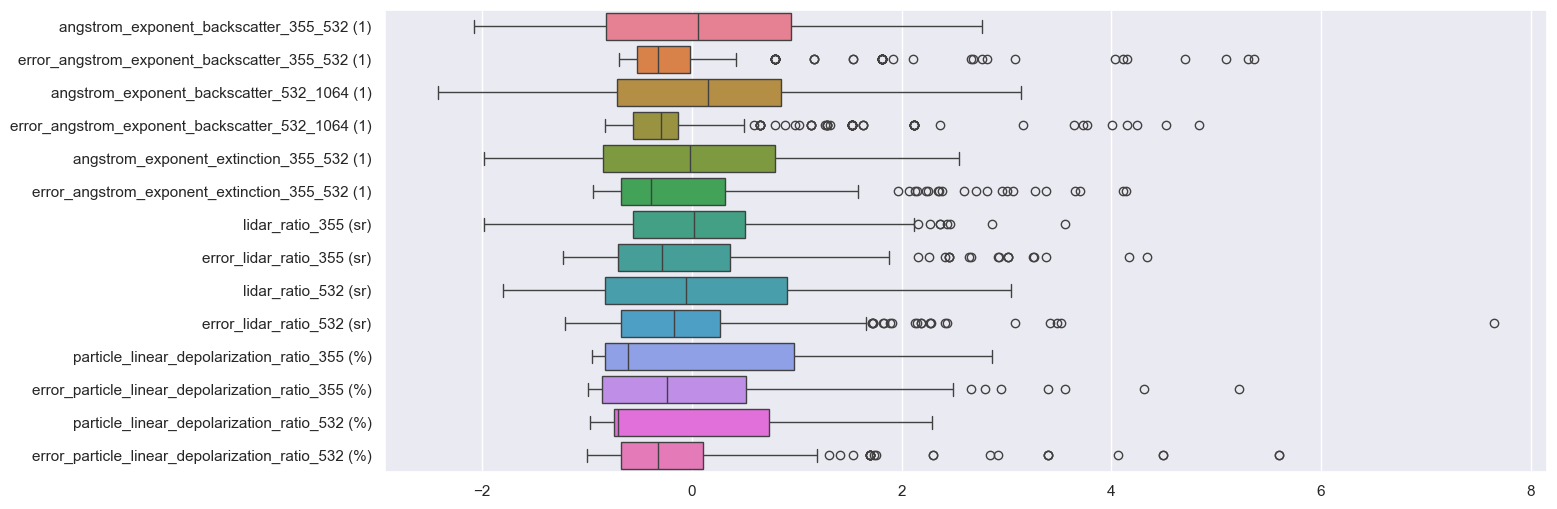

In [20]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_scaled, orient='h')  # 'h' for horizontal boxplots

plt.show()

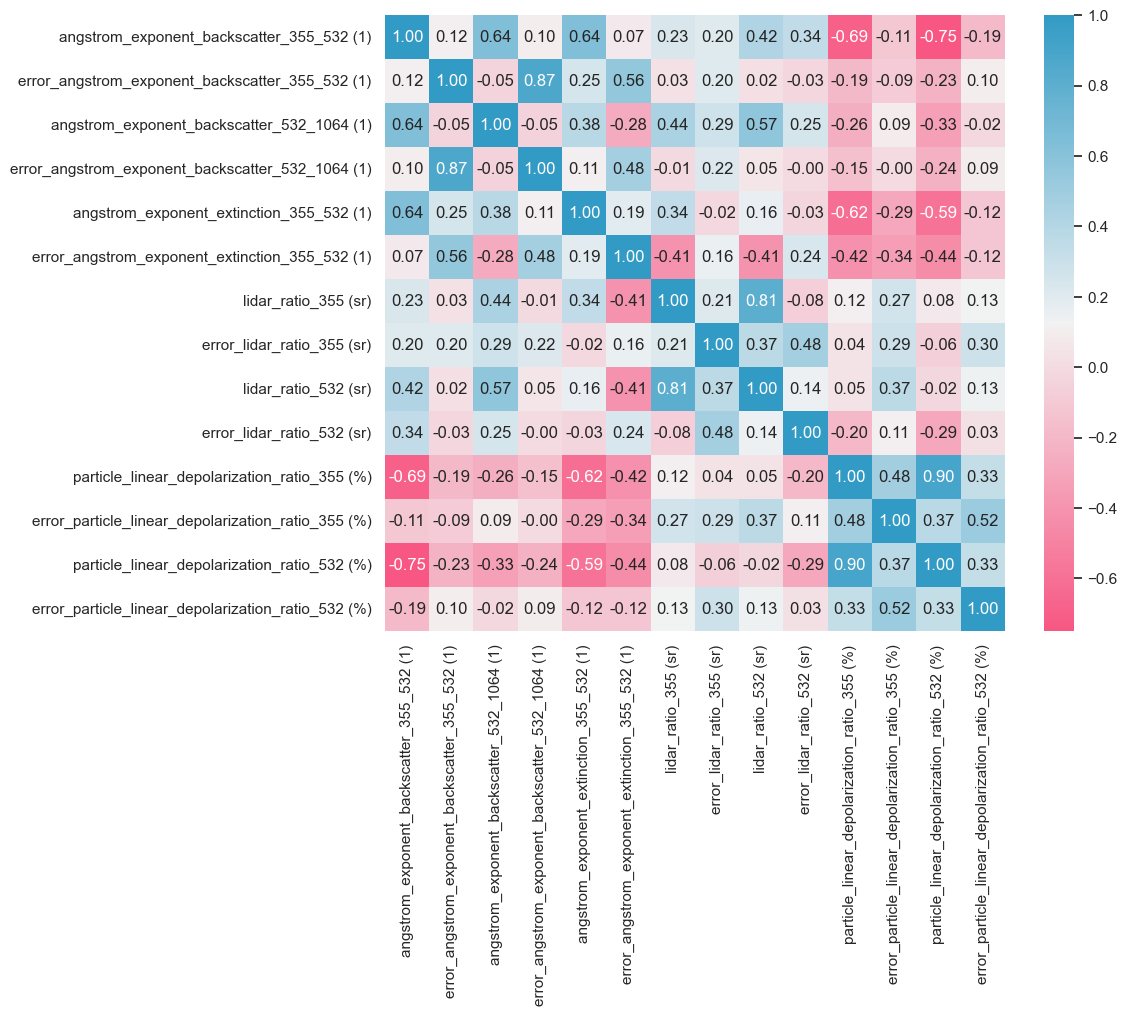

In [21]:
plt.figure(figsize=(10,8))
# correlation between columns
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)
plt.xticks(rotation=90)

plt.show()

In [22]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

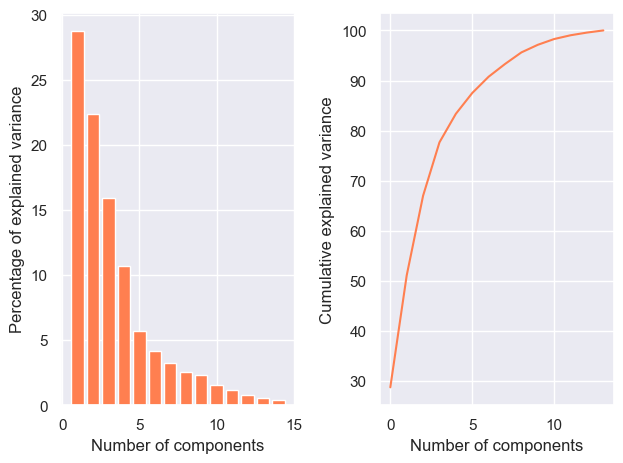

In [23]:
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 14
plt.bar(np.arange(1, n_bars+1), explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.tight_layout()
plt.show()

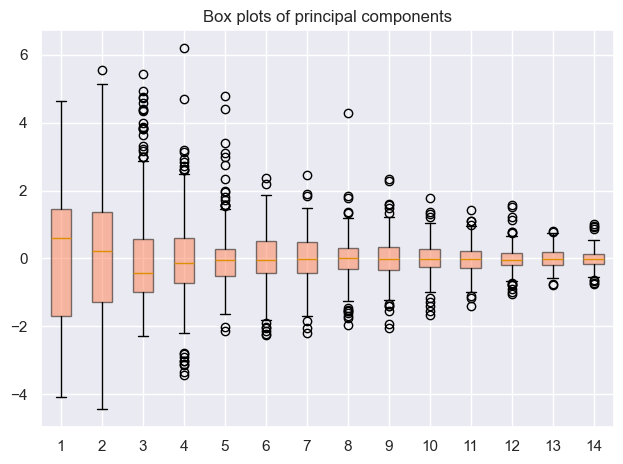

In [24]:
box = plt.boxplot(df_pca, patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of principal components")
plt.tight_layout()
plt.show()

### **Data Augmentation** 
Genrate new data based on the original data with the assumption that the properties follow the normal distributions 
*(we can run this before and after the models to compare the results)*

In [25]:
np.random.seed(28)

def generate_samples(individual_data, n_samples=10):
    means_columns = properties
    errors_columns = ['error_' + col for col in means_columns]
    
    means = individual_data[means_columns].astype(float).values
    errors = individual_data[errors_columns].astype(float).values
    
    generated_list = [individual_data[means_columns].values]  # Include only the properties
    
    # Generate new samples
    for _ in range(n_samples):
        # Generate random samples based on the mean and error values
        generated_values = np.random.normal(means, errors)
        generated_list.append(generated_values)
    
    generated_df = pd.DataFrame(generated_list, columns=means_columns)
    
    return generated_df

In [26]:
# Initialize a list to store DataFrames
generated_data = []

# Iterate over each row in the DataFrame
for index, row in df_imputed.iterrows():
    # Generate samples for the current row
    generated_df = generate_samples(row)
    # Append the DataFrame to the list without adding an index column
    generated_data.append(generated_df)

# Concatenate all DataFrames in the list into one DataFrame
df_generated = pd.concat(generated_data, ignore_index=True)

df_generated

,angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%)
0,0.610000,1.025000,0.840000,55.000000,48.000000,36.500000,10.883079
1,0.788533,1.742722,0.673504,50.160825,48.443913,38.014620,11.189601
2,0.489053,0.664384,0.513829,56.267539,29.364720,35.848580,9.267559
3,0.703714,1.557942,0.430289,53.668925,43.959602,36.920741,10.796376
4,0.302050,0.945998,0.951390,58.685281,53.203970,35.684470,11.235833
...,...,...,...,...,...,...,...
3471,1.306981,1.175807,1.712591,58.336416,48.897914,4.221975,3.172488
3472,1.595998,1.404200,1.543373,61.238770,61.409371,5.879061,3.201316
3473,1.289039,1.261890,1.489336,61.912598,63.250949,5.143399,3.269172
3474,1.289045,1.391607,1.283561,63.255137,48.206918,6.933866,3.202433


In [27]:
#Define a new df containing the label (type of aerosol) of the df_generated
aerosol_generated = []

for col in samples.columns:
  for i in range(int(samples[col].iloc[0]) * 11):
    aerosol_generated.append(col)
    
aerosol_generated = pd.DataFrame({"aerosol": aerosol_generated})

aerosol_generated['aerosol'] = aerosol_generated['aerosol'].astype('category') #convert type from Object to Categorical

aerosol_generated

,aerosol
0,Ash
1,Ash
2,Ash
3,Ash
4,Ash
...,...
3471,Central European background
3472,Central European background
3473,Central European background
3474,Central European background


### **Build the predicted models**

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#aerosol_encoder = label_encoder.fit_transform(aerosol.values.flatten())
aerosol_encoder = label_encoder.fit_transform(aerosol_generated.values.flatten())

# Print the mapping of original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping


{'Ash': 0,
 'Central Asian dust': 1,
 'Central European background ': 2,
 'Clean marine': 3,
 'Dried marine': 4,
 'Dust and marine': 5,
 'Dust and pollution': 6,
 'Dust and smoke': 7,
 'Middle Eastern dust': 8,
 'Pollution': 9,
 'Saharan dust': 10,
 'Smoke': 11,
 'Stratospheric smoke': 12}

Split the data set in a controlled manner to ensure the ratio between the training set and the test set is consistent for each class.

In [29]:
from sklearn.model_selection import train_test_split

#df = df_imputed[properties]
df = df_generated

X_train, X_test, y_train, y_test = train_test_split(df, aerosol_encoder, test_size=0.25, stratify=aerosol_encoder, shuffle=True, random_state=28)

In [30]:
ss.fit(X_train)
X_train = ss.transform(X_train)
# Keep the standardization parameters unchanged for the test set
X_test = ss.transform(X_test)

### **K-Nearest Neighbors**

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

param = {'n_neighbors':list(range(2,20))}

# cv=k means a k-fold cross-validation method was used to evaluate each parameter configuration.
# n_jobs=-1 means use all available CPU cores to speed up the search process.
stratified_k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=28) # Use the appropriate number of splits for the data

knn=GridSearchCV(KNeighborsClassifier(),param,cv=stratified_k_fold,n_jobs=-1, verbose =2)

#knnOpt will be the optimized version of kNN after the search.
knnOpt=knn.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (knnOpt.best_score_,knnOpt.best_params_))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


Best score = 0.883774, Best parameter = {'n_neighbors': 3}


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predict on the test set
y_pred = knnOpt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8883774453394706
[[ 11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0  26   0   0   0   0   0   0   5   0   8   0]
 [  0   0   1 141   1   0   0   0   0   0   0   0   0]
 [  0   0   0   1  15   1   0   0   0   2   0   0   0]
 [  0   0   0   0   0  54   2   1   1   0   0   0   0]
 [  0   0   0   0   0   6  29   5   0   0   1   0   0]
 [  0   0   0   0   0   1   5  60   1   0   2   0   0]
 [  0   2   0   0   0   0   1   0   6   0   2   0   0]
 [  0   0   9   8   0   0   0   0   0  90   0   9   0]
 [  0   4   0   0   0   0   0   0   1   0  77   0   0]
 [  0   0  12   0   0   0   0   0   0   4   0 179   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.98      0.95        63
           2       0.54      0.67      0.60        39
           3       0.94      0.99     

### **Support Vector Machine (SVM)**

In [33]:
from sklearn.svm import SVC

param = {'C':[0.001,0.01,0.1,1,10,100,1000]}
svm= GridSearchCV(SVC(),param,cv=stratified_k_fold,n_jobs=-1, verbose=2)
svmOpt=svm.fit(X_train, y_train)
print("Best score = %f, Best parameter = %s" % (svmOpt.best_score_,svmOpt.best_params_))

Fitting 3 folds for each of 7 candidates, totalling 21 fits


Best score = 0.902570, Best parameter = {'C': 100}


In [34]:
y_pred = svmOpt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9148446490218642
[[ 11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0  28   0   0   0   0   0   0   5   0   6   0]
 [  0   0   0 141   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0  18   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0  55   3   0   0   0   0   0   0]
 [  0   0   0   0   0   6  31   4   0   0   0   0   0]
 [  0   0   0   0   0   1   2  63   1   0   2   0   0]
 [  0   3   0   0   0   0   1   0   5   0   2   0   0]
 [  0   0   2   6   0   0   0   0   0 101   0   7   0]
 [  0   1   0   0   0   0   0   1   4   0  76   0   0]
 [  0   0  12   0   0   0   0   0   0   1   0 182   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.98      0.96        63
           2       0.67      0.72      0.69        39
           3       0.96      0.99     

### **Naive Bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB

param = [{'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}]
nb = GridSearchCV(GaussianNB(),param,cv=stratified_k_fold,n_jobs=-1, verbose=2)
nbOpt =nb.fit(X_train, y_train)
print("Best score = %f, Best parameter = %s" % (nbOpt.best_score_,nbOpt.best_params_))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best score = 0.863061, Best parameter = {'var_smoothing': 1e-09}


In [36]:
y_pred = nbOpt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8780207134637514
[[ 11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0  35   0   0   0   0   0   0   0   0   4   0]
 [  0   0   0 140   0   1   0   0   0   2   0   0   0]
 [  0   0   0   0  19   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1  47   8   1   0   0   0   0   0]
 [  0   0   0   0   0   8  30   3   0   0   0   0   0]
 [  0   0   0   0   0   1   5  58   0   0   5   0   0]
 [  0   3   0   0   0   0   1   0   4   0   3   0   0]
 [  0   0   6   1   0   1   0   0   0  91   0  17   0]
 [  0   3   0   0   0   1   0   0   3   0  75   0   0]
 [  0   0  17   1   0   0   0   1   0   7   0 169   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.98      0.95        63
           2       0.60      0.90      0.72        39
           3       0.98      0.98     

### **Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier

param=[{"max_depth": [1, 2, 4, 8, 16, 32, 64, None]}]

dtc = DecisionTreeClassifier(random_state=28)

tree= GridSearchCV(dtc,param,cv=stratified_k_fold,n_jobs=-1, verbose =2)
treeOpt=tree.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (treeOpt.best_score_,treeOpt.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best score = 0.841580, Best parameter = {'max_depth': 16}


In [38]:
y_pred = treeOpt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8665132336018412
[[ 10   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0  59   0   0   0   0   0   0   2   0   2   0   0]
 [  0   0  31   0   0   0   0   0   0   3   0   5   0]
 [  0   0   0 140   0   0   0   0   0   3   0   0   0]
 [  0   0   0   0  19   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0  52   3   1   0   0   0   1   0]
 [  0   0   0   1   0  11  25   3   1   0   0   0   0]
 [  0   1   0   0   0   1   5  56   1   0   3   0   2]
 [  0   2   0   0   0   0   0   0   6   0   3   0   0]
 [  0   0   5   3   0   1   2   0   0  89   0  16   0]
 [  0   3   0   0   0   0   2   4   4   0  69   0   0]
 [  0   0  10   0   0   0   0   0   0   9   0 176   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  21]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.91      0.94      0.92        63
           2       0.67      0.79      0.73        39
           3       0.97      0.98     

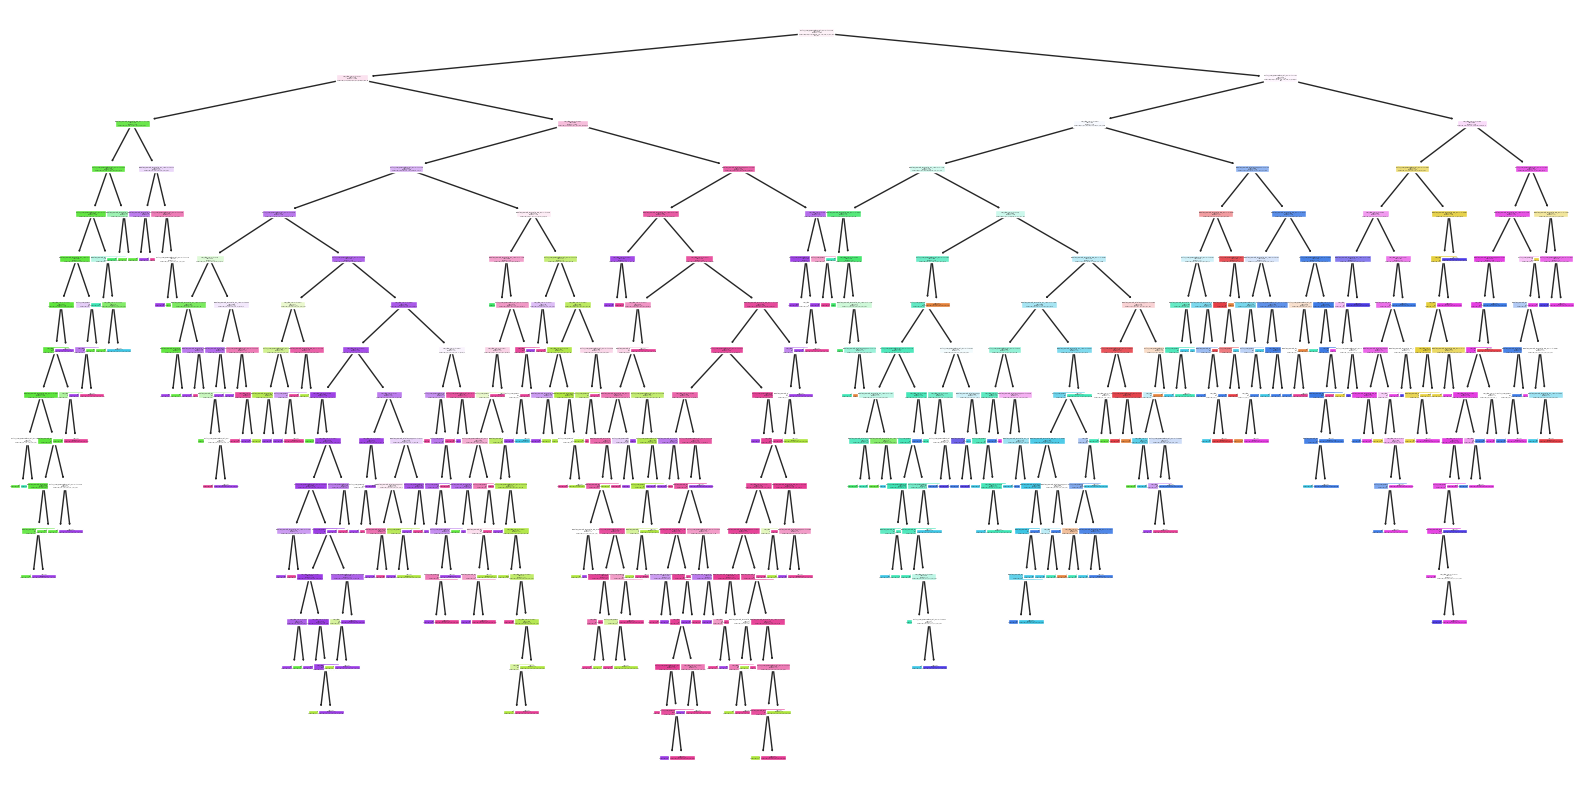

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10)) 
plot_tree(treeOpt.best_estimator_, filled = True, feature_names=df.columns.tolist())
plt.show() 

### **Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

param=[{'n_estimators': [50, 100, 500],
        'max_features': [2, 3, 4],
        'max_depth' : [2, 4, 8, None]}]

rf= GridSearchCV(RandomForestClassifier(random_state=28),param,cv=stratified_k_fold,n_jobs=-1, verbose = 2)

rfOpt=rf.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (rfOpt.best_score_,rfOpt.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score = 0.921366, Best parameter = {'max_depth': None, 'max_features': 2, 'n_estimators': 500}


In [41]:
y_pred = rfOpt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9321058688147296
[[ 11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0  28   0   0   0   0   0   0   3   0   8   0]
 [  0   0   0 141   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0  19   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  56   2   0   0   0   0   0   0]
 [  0   0   0   0   0   9  28   3   1   0   0   0   0]
 [  0   0   0   0   0   0   3  62   0   0   4   0   0]
 [  0   2   0   0   0   0   1   0   5   0   3   0   0]
 [  0   0   0   3   0   0   0   0   0 106   0   7   0]
 [  0   1   0   0   0   0   0   0   1   0  80   0   0]
 [  0   0   1   0   0   0   0   0   0   4   0 190   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      0.98      0.97        63
           2       0.97      0.72      0.82        39
           3       0.98      0.99     

In [42]:
rf= rfOpt.best_estimator_

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(df.columns[indices[f]], importances[indices[f]])

particle_linear_depolarization_ratio_532 (%) 0.21550137734489852
lidar_ratio_355 (sr) 0.1751168161820853
particle_linear_depolarization_ratio_355 (%) 0.15809893927546845
lidar_ratio_532 (sr) 0.14973925594947837
angstrom_exponent_backscatter_355_532 (1) 0.1126261776531716
angstrom_exponent_backscatter_532_1064 (1) 0.10678440655165965
angstrom_exponent_extinction_355_532 (1) 0.08213302704323819


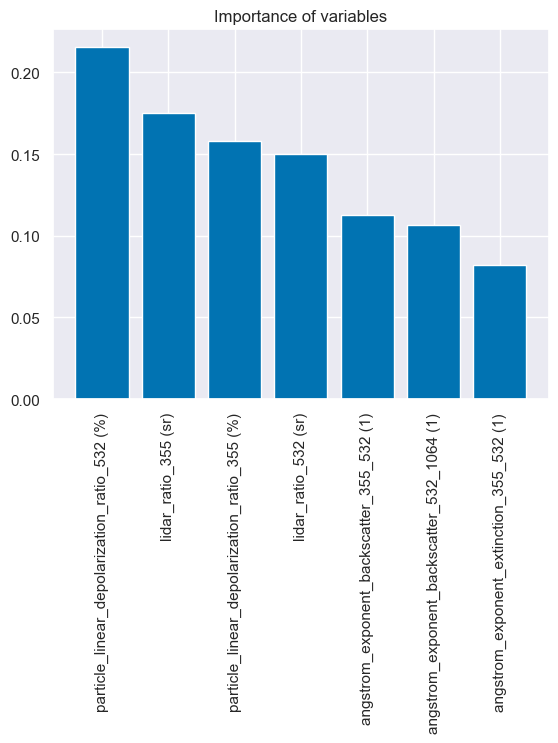

In [43]:
sorted_importances = [df.columns[indices[f]] for f in range(X_train.shape[1])]


plt.figure()
plt.title("Importance of variables")
plt.bar(range(X_train.shape[1]), importances[indices]);
plt.xticks(range(X_train.shape[1]), sorted_importances, rotation=90);
plt.show()

### **Hist Gradient Boosting**

In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier

param = [{
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 4, 8, None],
    'l2_regularization': [0, 0.1, 0.5]
}]
hgb = HistGradientBoostingClassifier(random_state=28)
hgbs = GridSearchCV(hgb, param, cv=stratified_k_fold, n_jobs=-1, verbose=2)

hgbOpt = hgbs.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (hgbOpt.best_score_,hgbOpt.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score = 0.927119, Best parameter = {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': 8}


In [45]:
y_pred = hgbOpt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9332566168009206
[[ 11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0  33   0   0   0   0   0   0   1   0   5   0]
 [  0   0   0 139   0   0   0   0   0   4   0   0   0]
 [  0   0   0   0  19   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  56   1   1   0   0   0   0   0]
 [  0   0   0   0   0  10  29   2   0   0   0   0   0]
 [  0   0   0   0   0   0   4  63   0   0   2   0   0]
 [  0   2   0   0   0   0   1   0   6   0   2   0   0]
 [  0   0   1   0   0   0   0   0   0 108   0   7   0]
 [  0   1   0   0   1   0   0   0   3   0  77   0   0]
 [  0   0   4   0   0   0   0   0   0   5   0 186   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      0.98      0.97        63
           2       0.87      0.85      0.86        39
           3       1.00      0.97     

### **Extreme Gradient Boosting (XGBoost)**

In [46]:
import xgboost
from xgboost import XGBClassifier

param = [{
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 4, 8, None]
}]

xgb = XGBClassifier(eval_metric='logloss', random_state=28)
xgbs = GridSearchCV(xgb, param, cv=stratified_k_fold, n_jobs=-1, verbose=2)

xgbOpt = xgbs.fit(X_train, y_train)

print("Best score = %f, Best parameter = %s" % (xgbOpt.best_score_,xgbOpt.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Best score = 0.927886, Best parameter = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


In [47]:
y_pred = xgbOpt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9309551208285386
[[ 11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0  32   0   0   0   0   0   0   2   0   5   0]
 [  0   0   0 141   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0  19   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  56   2   0   0   0   0   0   0]
 [  0   0   0   0   0  10  29   2   0   0   0   0   0]
 [  0   0   0   0   0   0   1  66   0   0   2   0   0]
 [  0   2   0   0   0   0   1   0   6   0   2   0   0]
 [  0   0   0   1   0   0   0   0   0 107   0   8   0]
 [  0   1   0   0   0   0   1   0   3   0  77   0   0]
 [  0   0   5   0   0   0   1   1   0   7   0 181   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      0.98      0.97        63
           2       0.86      0.82      0.84        39
           3       0.99      0.99     